In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.set_cmap("gray")

<Figure size 432x288 with 0 Axes>

In [2]:
# Read a PGM Image and return image matrix and its initials separately
def read_pgm(image_file):
    with open(image_file, 'r') as file:
        image = file.read().splitlines()
    for pixel in range(3,len(image)):
        image[pixel] = int(image[pixel])
    image_matrix = np.array(image[4:]).reshape(int(image[2].split()[1]),int(image[2].split()[0]))
    return (image_matrix, image[:4])

In [3]:
# Define Zero Padding
def zero_padding(image_matrix, width):
    padded_matrix = np.zeros((image_matrix.shape[0]+2*width,image_matrix.shape[1]+2*width))   
    padded_matrix[width:-width, width:-width] = image_matrix    
    return padded_matrix

In [4]:
def local_enhancement(image_matrix, width, c, k0,k1,k2,k3 ):
    mg = np.mean(image_matrix)
    sg = np.std(image_matrix)
    k = (width-1)//2
    padded_image_matrix = zero_padding(image_matrix, k)
    filtered_matrix = np.zeros((image_matrix.shape[0],image_matrix.shape[1]))
    progress = 0
    print('local_enhancement progress (in %)...')   
    for i in range(k,padded_image_matrix.shape[0]-k):
        for j in range(k,padded_image_matrix.shape[1]-k):          
            progress = progress +1
            if progress%10 == 0:           
                print(round(progress/image_matrix.size*100,2), end='\r')
            neighborhood = padded_image_matrix[i-k:i+k+1,j-k:j+k+1]
            ms = np.mean(neighborhood)
            ss = np.std(neighborhood) 
            if ((k0*mg <= ms <= k1*mg) and (k2*sg <= ss <= k3*sg)):
                filtered_matrix[i-k,j-k] = int(c*image_matrix[i-k,j-k])
            else:
                filtered_matrix[i-k,j-k] = image_matrix[i-k,j-k] 
    return filtered_matrix

In [5]:
# Write PGM Image from matrix.
def matrix2pgm(image_matrix,initial,output_image_file_name = str(np.random.randint(1,100000000000)) + '_default.pgm'):    
    with open(output_image_file_name, 'w') as file:
        file.writelines("% s\n" % pixel for pixel in initial)
        file.writelines("% s\n" % int(abs(pixel)) for pixel in image_matrix.flatten())

mg =  173.12918234345605
sg =  89.20491157989242


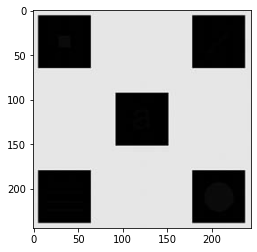

In [6]:
image = read_pgm('v.pgm')
image_matrix = image[0]
plt.imshow(image_matrix)
print('mg = ',np.mean(image_matrix))
print('sg = ',np.std(image_matrix))

local_enhancement progress (in %)...


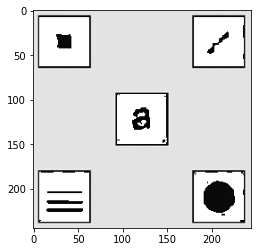

In [7]:
# Sharpened Image
filtered_matrix = local_enhancement(image_matrix, 3, 10.25, 0,0.194,0,0.194 )
filtered_matrix[filtered_matrix>255]=255
plt.imshow(filtered_matrix)
matrix2pgm(filtered_matrix,image[1],output_image_file_name = 'enhanced.pgm')